# Introduction to Keras

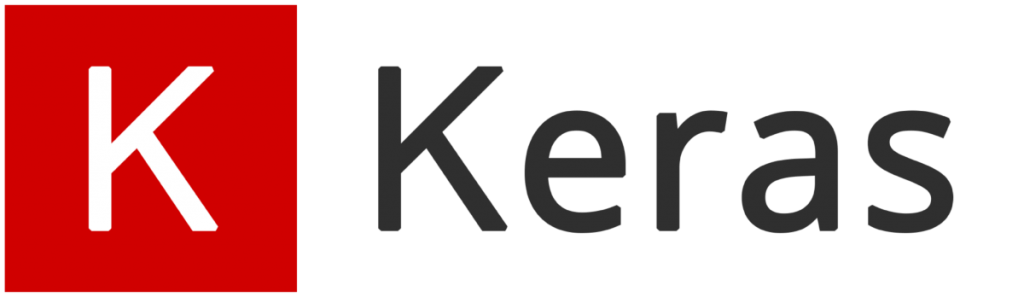

This notebook is based on the Chapter 10 *Introduction to Artificial Neural Networks with Keras*, Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. concepts, Tools, and Techiniques to Build Intelligent Systems, by Aurélien Géron. Ed. O'Reilly. 

A more complete notebook based on the same book can be found [here](https://github.com/karthik9001/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow-2nd-Edition/blob/master/10_neural_nets_with_keras.ipynb).

## Importing the library

Keras is a Deep Learning API that can use several backends, i.e., the library that really implements the Deep Learning stuff. Examples of DL libraries are TensorFlow, Microsoft Cognitive Toolkit (CNTK) and Theano. The most popular one is TensorFlow, and actually it has Keras integrated in the library.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

## Loading the dataset

In this example we will use fashion MNIST, which is a widely known image dataset more challenging that MINIST. It contains 70000 greyscale 28x28 images with 10 classes.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

We inspect our data in first place.

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
import numpy as np

print(f"Max: {np.max(X_train_full)}")
print(f"Min: {np.min(X_train_full)}")

Max: 255
Min: 0



Bad key text.latex.preview in file /home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg i

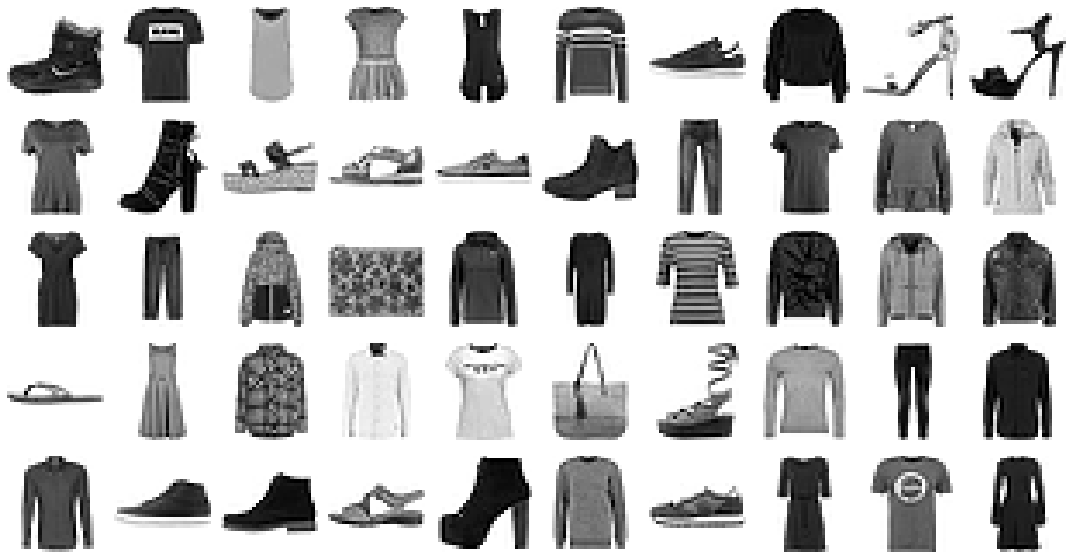

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train_full[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

Normalize and split a validation set.

In [9]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Angle boot"]

class_names[y_train[0]]

'Coat'

# Creating the model using the Sequential API

Keras comes with two APIs:
* Sequential: simple and powerful.
* Functional: more flexible but less simple.

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Observe:
- *Flatten layer*, with *input_shape*.
- *Dense* layers with relu activation.
- The last layer is *Dense* with 10 neurons and softmax activation.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


First Dense layer with $235,500 = 784 * 300 + 300$ (bias neurons).

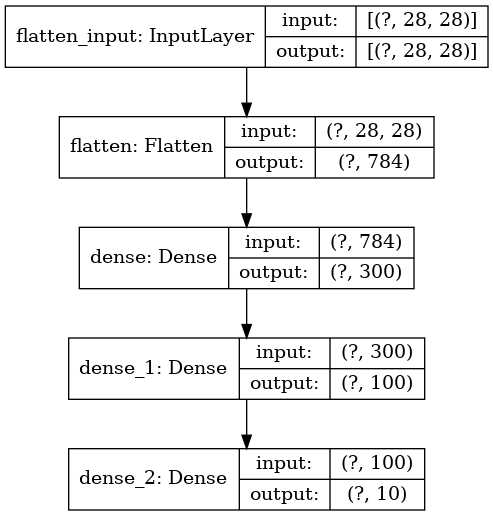

In [13]:
# You need pydot graphviz and run this

keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]

hidden1

In [15]:
weights, biases = hidden1.get_weights()

weights

array([[ 0.01752277,  0.01362783,  0.00418897, ..., -0.0341955 ,
        -0.01884952,  0.05644995],
       [-0.06846268,  0.05023917, -0.03177001, ..., -0.04263068,
         0.07288519, -0.02636024],
       [ 0.04752613,  0.03956233, -0.01125646, ...,  0.01608989,
         0.04772054, -0.04596996],
       ...,
       [-0.02479768, -0.04185433,  0.00102287, ...,  0.03087869,
        -0.01884722, -0.06129186],
       [-0.04953088,  0.02768911,  0.01592017, ...,  0.0672463 ,
        -0.02081466,  0.06970219],
       [-0.03323592, -0.02242029,  0.00827441, ...,  0.04391882,
         0.01764548,  0.06132008]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Observe:
- "sparse_categorical_crossentropy" loss function because labels are sparce, i.e., indices.
- "sgd" optimizer.
- "accuracy" metric.

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Training and evaluating the model

And here we go!

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7106 - accuracy: 0.7658 - val_loss: 0.5006 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4840 - accuracy: 0.8307 - val_loss: 0.4479 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4396 - accuracy: 0.8451 - val_loss: 0.4362 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4135 - accuracy: 0.8540 - val_loss: 0.4061 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8611 - val_loss: 0.3953 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8659 - val_loss: 0.3687 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8709 - val_loss: 0.3750 - val_accuracy:

Alternatively:

In [21]:
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

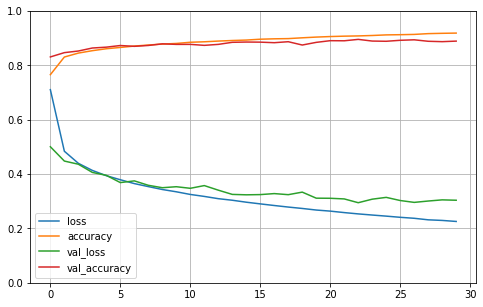

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We finally evaluate the model.

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 957us/step - loss: 0.3344 - accuracy: 0.8806


[0.33443787693977356, 0.8805999755859375]

## Using the model to make predictions

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Angle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [32]:
X_new[:,3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4       , 1.        , 0.90588235, 0.89411765, 0.89019608,
        0.89411765, 0.91372549, 0.90196078, 0.90196078, 0.89803922,
        0.89411765, 0.90980392, 0.90980392, 0.90588235, 0.89019608,
        0.87843137, 0.98823529, 0.70196078, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.92156863, 0.90588235, 0.91372549, 0.88627451,
        0.88235294, 0.8980

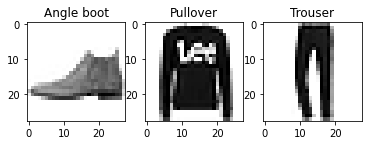

In [33]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.title(class_names[y_pred[i]])

## Saving and restoring

In [34]:
model.save("my_model.h5")

In [35]:
anothermodel = keras.models.load_model("my_model.h5")

In [36]:
anothermodel.predict(X_new[:1])

array([[3.0427739e-07, 6.8994005e-08, 4.9761508e-07, 2.7118952e-07,
        3.5464527e-07, 1.4798112e-03, 1.0229619e-06, 2.9751060e-03,
        4.8808113e-05, 9.9549377e-01]], dtype=float32)